## 习题 3.5

In [1]:
raw_data <- read.csv("./ex_3_5.csv")
raw_data

科研经费投入,生产能力提高量,生产能力提高量.1,生产能力提高量.2,生产能力提高量.3,生产能力提高量.4,生产能力提高量.5,生产能力提高量.6,生产能力提高量.7,生产能力提高量.8,生产能力提高量.9,生产能力提高量.10,生产能力提高量.11
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
低,7.6,8.2,6.8,5.8,6.9,6.6,6.3,7.7,6,,,NA
中,6.7,8.1,9.4,8.6,7.8,7.7,8.9,7.9,8.3,8.7,7.1,8.4
高,8.5,9.7,10.1,7.8,9.6,9.5,,,,,,NA


In [2]:
t_raw_data = t(raw_data)  # 转置，方便取数据

dict = c("low", "mid", "high")
names(dict) <- c("低", "中", "高")

investment = c()   # 科研经费投入
improvement = c()  # 生产能力提高量

for (i in 1:3) {
    b = dict[[t_raw_data[[1,i]]]]   # 科研经费投入
    
    a = array(t_raw_data[-1,i])   # 生产能力提高量：下面 2 行将数据转化为 dobule 型，并清除 NA、空值
    a = apply(a[!is.na(a)], 1, as.double)  # 这里会有一些产生 NA 的 Warning，这个问题来自：as.double("")，不必在意
    a = a[!is.na(a)]  
    
    for (p in a) {
        investment = c(investment, b)
        improvement = c(improvement, p)
    }
}

data = data.frame(investment, improvement)
data

Warning message in apply(a[!is.na(a)], 1, as.double):
“强制改变过程中产生了NA”
Warning message in apply(a[!is.na(a)], 1, as.double):
“强制改变过程中产生了NA”
Warning message in apply(a[!is.na(a)], 1, as.double):
“强制改变过程中产生了NA”
Warning message in apply(a[!is.na(a)], 1, as.double):
“强制改变过程中产生了NA”
Warning message in apply(a[!is.na(a)], 1, as.double):
“强制改变过程中产生了NA”
Warning message in apply(a[!is.na(a)], 1, as.double):
“强制改变过程中产生了NA”
Warning message in apply(a[!is.na(a)], 1, as.double):
“强制改变过程中产生了NA”


investment,improvement
<chr>,<dbl>
low,7.6
low,8.2
low,6.8
low,5.8
low,6.9
low,6.6
low,6.3
low,7.7
low,6.0


#### （1）

![题（1）](https://tva1.sinaimg.cn/large/008i3skNly1gr76e2inkyj31eg03y0ua.jpg)

首先，通过箱线图，直观感觉是有显著差异的：

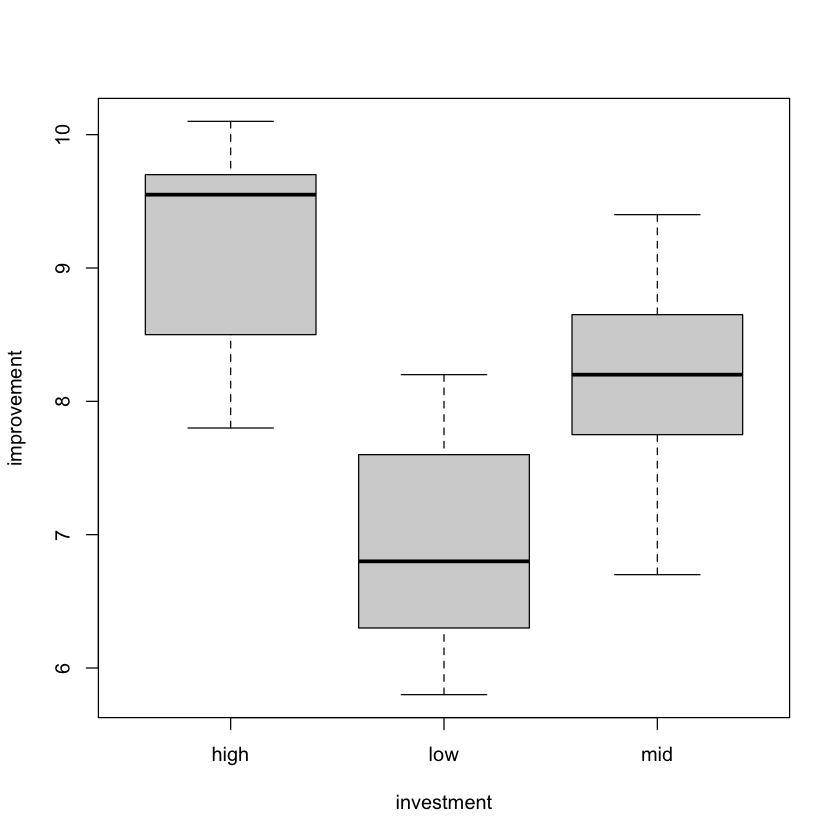

In [3]:
boxplot(improvement ~ investment, data = data)

接下来建立方差分析表：

In [4]:
dfc <- aov(improvement ~ investment, data=data)
summary(dfc)

            Df Sum Sq Mean Sq F value   Pr(>F)    
investment   2  20.12   10.06   15.72 4.33e-05 ***
Residuals   24  15.36    0.64                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

检验 $p < 0.05$，拒绝原假设，认为在显著水平 $\alpha=0.05$ 下过去三年科研经费投入的不同对当年生产力的提高有显著影响。

#### （2）

![题（2）](https://tva1.sinaimg.cn/large/008i3skNly1gr771206vtj61fo08an1e02.jpg)

首先为了方便，提取出几个组：

In [5]:
group_low  <- data[investment=="low",]
group_mid  <- data[investment=="mid",]
group_high <- data[investment=="high",]

利用 `t.test` 容易获取到均值的置信区间：

> ref: https://zhuanlan.zhihu.com/p/35713329

In [6]:
t.test(group_low$improvement)


	One Sample t-test

data:  group_low$improvement
t = 25.361, df = 8, p-value = 6.261e-09
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 6.252390 7.503166
sample estimates:
mean of x 
 6.877778 


其中 `mean of x` 为均值，`confidence interval` 即置信区间。

为了方便，封装如下函数，用来提取这些信息：

In [7]:
mean_confin <- function(x, ...) {    # mean and confidence interval of x by t.test
    t.res <- t.test(x, ...)
    mean_val <- t.res$estimate[["mean of x"]]
    mean_conf.in <- t.res$conf.in
    
    res <- c(mean_val, mean_conf.in)
    names(res) <- c("mean", "conf.left", "conf.right")
    
    res  # ret
}

调用上面封装的函数可以很方便地得到一个表格：

In [8]:
mu <- (function() {
    L <- mean_confin(group_low$improvement)
    M <- mean_confin(group_mid$improvement)
    H <- mean_confin(group_high$improvement)
    
    rbind(L, M, H)
})()
mu

,mean,conf.left,conf.right
L,6.877778,6.252390,7.503166
M,8.133333,7.652239,8.614427
H,9.200000,8.289951,10.110049


得到三年经费投入为低、中、高情况下当年生产能力提高量的均值为：

$$
\begin{aligned}
\mu_L & =  6.877778 \\
\mu_M & =  8.133333 \\
\mu_H & =  9.2 \\
\end{aligned}
$$

各 95% 置信区间如下：

$$
\begin{aligned}
\mu_L & \in  (6.252390, 7.503166) \\
\mu_M & \in (7.652239, 8.614427) \\
\mu_H & \in (8.289951, 10.110049) \\
\end{aligned}
$$

当然，这里也可以手动实现计算过程，但比较麻烦：

要求 Bonferroni 同时置信区间，R 好像没有内置的实现，同样手写麻烦，所以考虑调用第三方包：

> ref: https://stackoverflow.com/questions/48572619/bonferroni-simultaneous-confidence-intervals-of-differences-in-means

In [9]:
# install.packages("DescTools")
require(DescTools)
PostHocTest(dfc, method = "bonferroni")

Loading required package: DescTools




  Posthoc multiple comparisons of means : Bonferroni 
    95% family-wise confidence level

$investment
              diff     lwr.ci      upr.ci    pval    
low-high -2.322222 -3.4074430 -1.23700140 3.5e-05 ***
mid-high -1.066667 -2.0961975 -0.03713579  0.0405 *  
mid-low   1.255556  0.3475947  2.16351644  0.0048 ** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


得到 $\mu_L-\mu_M$，$\mu_L-\mu_H$ 和 $\mu_M-\mu_H$ 的置信度不小于 95% 的 Bonferroni 同时置信区间：

$$
\begin{aligned}
\mu_L-\mu_M & \in (-2.16351644, -0.3475947  ) \\
\mu_L-\mu_H & \in (-3.4074430, -1.23700140) \\
\mu_M-\mu_H & \in (-2.0961975, -0.03713579) \\
\end{aligned}
$$

从 $\mu_L-\mu_M$，$\mu_L-\mu_H$ 和 $\mu_M-\mu_H$ 的 Bonferroni 同时置信区间都位于负值区间可知，
随着三年科研经费的投入越高，当年生产能力的改善越显著。